In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Restart runtime after every run.
!git clone https://github.com/Zafar-Lab/scDREAMER.git

Cloning into 'scDREAMER'...
remote: Enumerating objects: 950, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 950 (delta 54), reused 52 (delta 35), pack-reused 849
Receiving objects: 100% (950/950), 126.75 MiB | 25.00 MiB/s, done.
Resolving deltas: 100% (408/408), done.


In [ ]:
# Restart the run post installation of below libraries
!ls
!pip install -U scipy==1.10.1
!pip install scanpy==1.9.3

drive  sample_data
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.2
    Uninstalling scipy-1.11.2:
      Successfully uninstalled scipy-1.11.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=2ce27101dec1ee35f3c755fc37078bc3bde8100bf708c57f1780899ac8c07b66
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d

In [ ]:
%cd scDREAMER/

In [ ]:
import os
from pathlib import Path
import scanpy as sc
import time
import sys
import warnings
warnings.filterwarnings('ignore')
import os
import random
import numpy as np
import tensorflow as tf2
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import scDREAMER.model as model
from datasets_dict import datasets
import pandas as pd


Reading data


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.cast` instead.


encoder input shape  Tensor("concat:0", shape=(?, 2023), dtype=float32)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



decoder input shape  Tensor("concat_2:0", shape=(?, 33), dtype=float32)
KL gaussian z Tensor("mul_10:0", shape=(?,), dtype=float32)
KL gaussian l Tensor("mul_9:0", shape=(?,), dtype=float32)
scDREAMER on DataSet /content/drive/MyDrive/Colab Notebooks/integrationDatasets/Immune_ALL_hum_mou_hvg.h5ad ... 
Epoch : [0] ,  a_loss = 519.6571
Epoch : [10] ,  a_loss = 423.5171
Epoch : [20] ,  a_loss = 409.3174
Epoch : [30] ,  a_loss = 404.4719
Epoch : [40] ,  a_loss = 402.7140
Epoch : [50] ,  a_loss = 401.8970
Epoch : [60] ,  a_loss = 401.5810
Epoch : [70] ,  a_loss = 401.3283
Epoch : [80] ,  a_loss = 401.0881
Epoch : [90] ,  a_loss = 400.8437
Epoch : [100] ,  a_loss = 403.4240
Epoch : [110] ,  a_loss = 399.9361
Epoch : [120] ,  a_loss = 398.5378
Epoch : [130] ,  a_loss = 396.7129
Epoch : [140] ,  a_loss = 394.0820
Epoch : [150] ,  a_loss = 391.2002
Epoch : [160] ,  a_loss = 390.7528
Epoch : [170] ,  a_loss = 390.2095
Epoch : [180] ,  a_loss = 389.4049
Epoch : [190] ,  a_loss = 390.2928
Epoch :

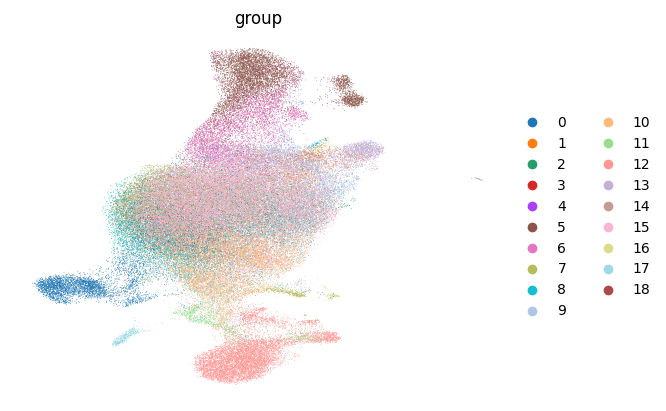

None


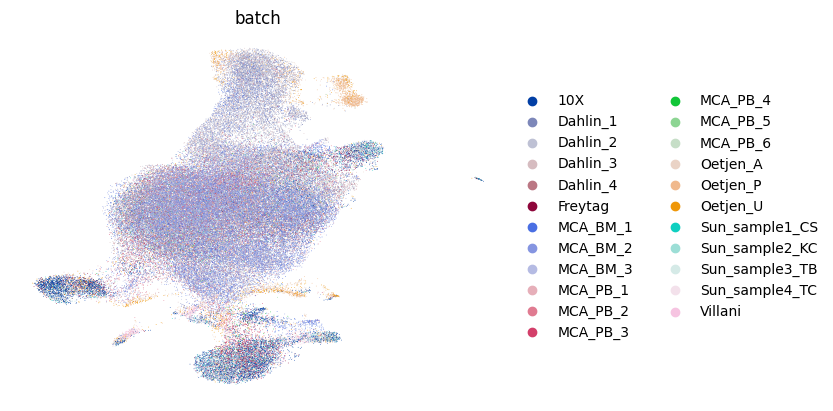

None
Computing NMI ...
Done !
NMI = 0.3990486622968616
Integrated:  Immune_ALL_hum_mou
Duration: 52.0 minutes and 34.38965892791748 seconds
Integrated data saved


In [ ]:
np.random.seed(0)
tf.set_random_seed(0)
random.seed(0)
tf2.random.set_seed(0)
tf2.keras.utils.set_random_seed(0)


# When using colab, set the path to the modules directory to use saved modules
sys.path.append('/content/drive/MyDrive/modules/')
from datasets_dict import datasets

# path to the original dataset (after subset to 3000 highly variable genes)
base_path = '/content/drive/MyDrive/Colab Notebooks/integrationDatasets/'
outPath = os.path.join(base_path, 'integratedDatasets', 'scDREAMER')

# Define runing time file path to track runtime
csv_file = os.path.join(outPath, 'execution_times.csv')

# Create the CSV with header if it doesn't exist
if not os.path.exists(csv_file):
    with open(csv_file, 'w') as f:
        f.write("Dataset,Execution Time\n")


# scDREAMER parameters (taken from scDREAMER github tutorial)
lr_ae = 0.0002
lr_dis = 0.0007

for dataset_name in datasets.keys():

  # get dataset parameters
  label_key = datasets[dataset_name]['label_key']
  batch_key = datasets[dataset_name]['batch_key']

  # set paths
  inPath = os.path.join(base_path, f"{dataset_name}_hvg.h5ad")

  # create directory if does not exists
  Path(outPath).mkdir(parents=True, exist_ok=True)

  # read the original dataset
  adata = sc.read(inPath)
  cell_type_labels = adata.obs[label_key]

  # integrate the dataset

  start_time = time.time()

  run_config = tf.ConfigProto()
  run_config.gpu_options.per_process_gpu_memory_fraction = 0.333
  run_config.gpu_options.allow_growth = True

  with tf.Session(config = run_config) as sess:

      dreamer = model.scDREAMER(
          sess,
          epoch = 250,
          dataset_name = inPath,
          batch = batch_key,
          cell_type = label_key,
          name = dataset_name,
          lr_ae = lr_ae,
          lr_dis = lr_dis,
          )

      dreamer.train_cluster()


  end_time = time.time()

  # calculate integration duration time
  elapsed_time = end_time - start_time
  minutes, seconds = divmod(elapsed_time, 60)

  print("Integrated: ", dataset_name)
  print(f"Duration: {minutes} minutes and {seconds} seconds")

  # write integrated data
  sc.write(os.path.join(outPath, f"{dataset_name}_integrated.h5ad"), adata)
  print("Integrated data saved")

  # Append execution time to CSV
  execution_times = {dataset_name: elapsed_time}
  df = pd.DataFrame(list(execution_times.items()), columns=['Dataset', 'Execution Time'])
  df.to_csv(csv_file, mode='a', header=False, index=False)



In [ ]:
import os
from pathlib import Path
import scanpy as sc
import pandas as pd
import sys

sys.path.append('/content/drive/MyDrive/modules/')
from datasets_dict import datasets
import plottingData

# convert resulting csv files to h5ad for anndata format
base_path = '/content/drive/MyDrive/Colab Notebooks/integrationDatasets/'
outPath = os.path.join(base_path, 'integratedDatasets', 'scDREAMER')
plot_path = '/content/drive/MyDrive/Colab Notebooks/integrationDatasets/final_plots/scDREAMER/'
method = 'scDREAMER'


for dataset_name in datasets.keys():

  # skip the second dataset since the method failed to integrate it
  # (failed with an error saying there are None values in the result)
  if dataset_name == "small_atac_peaks":
    continue

  # get dataset parameters
  label_key = datasets[dataset_name]['label_key']
  batch_key = datasets[dataset_name]['batch_key']

  # set paths
  inPath = os.path.join(base_path, f"{dataset_name}_hvg.h5ad")

  # read the original dataset and copy it
  integ_data = sc.read(inPath).copy()

  # load csv embeddings files
  latent_matrix = pd.read_csv(os.path.join(outPath,
                              f"{dataset_name}latent_matrix_250.csv"),
                              header=None)

  # add integrated embeddings
  integ_data.obsm['X_emb'] = latent_matrix.values

  # save anndata
  sc.write(os.path.join(outPath, f"{dataset_name}_integrated.h5ad"), integ_data)

  # plot integrated dataset
  print("Plotting integrated dataset-")
  dpi = 300
  categories = [batch_key, label_key]
  plot_name = f"{method}_{dataset_name}_integrated"
  plottingData.plot_datasets(integ_data, categories, plot_path, dpi, plot_name, use_emb=True)
